## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from IPython.display import display, HTML

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_table = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')

# Display the data table for preview
merge_table

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1887,z969,Naftisol,Male,9,30,25,63.145652,2
1888,z969,Naftisol,Male,9,30,30,65.841013,3
1889,z969,Naftisol,Male,9,30,35,69.176246,4
1890,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice.
Total_mice_unique = len(merge_table["Mouse ID"].unique())
print(f"Total unique mice: {Total_mice_unique}")


Total unique mice: 249


In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
find_dupe = merge_table[merge_table.duplicated(["Mouse ID","Timepoint"])]
dupe_mice = find_dupe["Mouse ID"].unique()
summary_df = pd.DataFrame({"Duplicate Mice": dupe_mice})
summary_df.head()

,Duplicate Mice
0,g989


In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
find_dupe


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
910,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
table_excl_dupe = merge_table[merge_table['Mouse ID'].isin(dupe_mice)==False]
table_excl_dupe


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1887,z969,Naftisol,Male,9,30,25,63.145652,2
1888,z969,Naftisol,Male,9,30,30,65.841013,3
1889,z969,Naftisol,Male,9,30,35,69.176246,4
1890,z969,Naftisol,Male,9,30,40,70.314904,4


In [11]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean_unique = len(table_excl_dupe["Mouse ID"].unique())
print(f"Total unique mice: {num_mice_clean_unique}")


Total unique mice: 248


## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
group_by_drug = table_excl_dupe.groupby(["Drug Regimen"])

# create mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_mean = group_by_drug["Tumor Volume (mm3)"].mean()
drug_median = group_by_drug["Tumor Volume (mm3)"].median()
drug_var = group_by_drug["Tumor Volume (mm3)"].var()
drug_std = group_by_drug["Tumor Volume (mm3)"].std()
drug_sem = group_by_drug["Tumor Volume (mm3)"].apply(st.sem)

# summary of dataframe
drug_df = pd.DataFrame({    "Mean": drug_mean,
                            "Median": drug_median,
                            "Variance": drug_var,
                            "Standard Deviation": drug_std,
                            "SEM": drug_sem
                        })
drug_df.head()

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# create mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
drug_df_2 = group_by_drug.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
drug_df_2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

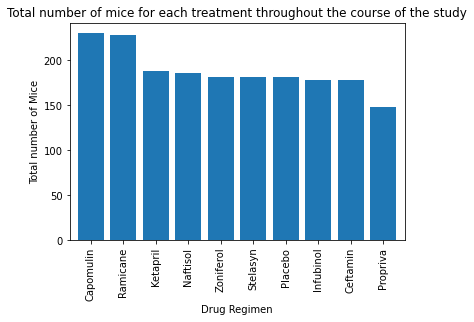

<Figure size 432x288 with 0 Axes>

In [14]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
# Filter the DataFrame down only to those 

counts = table_excl_dupe["Drug Regimen"].value_counts()

# Use DataFrame.plot() in order to create a bar chart of the data
counts.plot(kind="bar", width=0.8)

# Set a title for the chart
plt.title("Total number of mice for each treatment throughout the course of the study")
plt.xlabel("Drug Regimen")
plt.ylabel("Total number of Mice")

plt.show()
plt.tight_layout()

<function matplotlib.pyplot.show(close=None, block=None)>

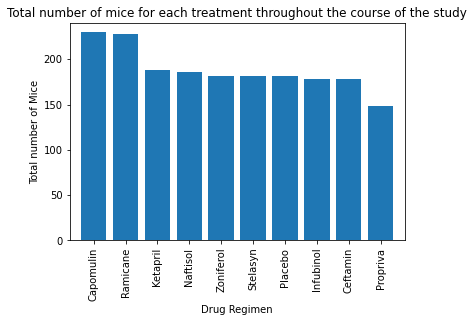

In [17]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# Create a bar chart based upon the data
plt.bar(counts.index.values, counts.values, alpha=1, align="center")

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in counts.index.values]
plt.xticks(tick_locations, counts.index.values, rotation=90)

# Set the limits of the x axis
plt.xlim(-0.75, len(counts.index.values)-0.25)

# Set the limits of the y axis
plt.ylim(0, max(counts.values)+10)

# Give the chart a title, x label, and y label
plt.title("Total number of mice for each treatment throughout the course of the study")
plt.xlabel("Drug Regimen")
plt.ylabel("Total number of Mice")

plt.show

In [18]:
# group by gender
gender_grouped = table_excl_dupe.groupby(["Sex"])

# Calculate number and percentages by age group
gender_count = gender_grouped["Mouse ID"].nunique()
perc_by_gender = ((gender_count/num_mice_clean_unique)*100).astype(float).map("{:,.2f}%".format)

# Create summary data frame, sort by highest Total Count
gender_demographics = pd.DataFrame({   "Total Count": gender_count,
                                    "Percentage of Gender": perc_by_gender
                                    }).sort_values("Total Count", ascending=False)

# display age_demographics table
gender_demographics

,Total Count,Percentage of Gender
Sex,,
Male,125,50.40%
Female,123,49.60%


Text(0, 0.5, 'Sex')

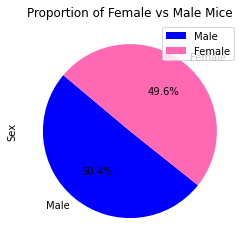

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# choose meaningful colours
colors = ["blue", "hotpink"]

# plot chart
gender_demographics.plot(y='Total Count',kind="pie",autopct='%1.1f%%', colors =colors, startangle=140)

# Add labels
plt.title("Proportion of Female vs Male Mice")
plt.ylabel("Sex")


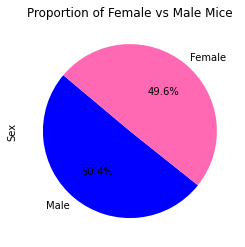

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# choose meaningful colours
colors = ["blue", "hotpink"]

# plot chart
plt.pie(gender_demographics['Total Count'],colors = colors, startangle=140, autopct='%1.1f%%',labels = mouse_metadata["Sex"].unique())

# Add labels
plt.title("Proportion of Female vs Male Mice")
plt.ylabel("Sex")

plt.show()


## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Put treatments into a list for for loop (and later for plot labels)
drug_list = ("Capomulin", "Ramicane", "Infubinol","Ceftamin")
dict_drugs = {}

for drugs in drug_list:
    # Start by getting the last (greatest) timepoint for each mouse
    dict_drugs[str(drugs)+"_df"] = table_excl_dupe.loc[table_excl_dupe["Drug Regimen"] == f"{drugs}",:]
    last = dict_drugs[str(drugs)+"_df"].groupby('Mouse ID').max()['Timepoint']
    vol = pd.DataFrame(last)

    # Merge this group df with the original dataframe to get the tumor volume at the last timepoint
    merge = pd.merge(vol, table_excl_dupe, on=("Mouse ID","Timepoint"),how="left")

    # Locate the rows which contain mice on each drug and get the tumor volumes, note filter for each drug done above
    dict_drugs[str(drugs)+"_tumors"] = merge["Tumor Volume (mm3)"]

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = dict_drugs[str(drugs)+"_tumors"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"{drugs}:")
    print(f" ")
    print(f"The lower quartile is {round(lowerq,2)} and upper quartile is {round(upperq,2)}.")
    print(f"The interquartile range is: {round(iqr,2)}.")
    print(f"The median is: {round(quartiles[0.5],2)}.")

    # Determine outlier boundaries using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print(f"Values below {round(lower_bound,2)} and above {round(upper_bound,2)} could be outliers.")

    # determine outliers
    merge["outliers"] = (merge["Tumor Volume (mm3)"] < lower_bound) |(merge["Tumor Volume (mm3)"] > upper_bound)
    outliers = merge.loc[merge["outliers"] == True,:]

    if outliers.empty:
        print(f"There are no potential outliers.")
    else:
        print(f"The potential outliers are:")
        display(HTML(outliers.to_html()))
    print("--------------------------------------------------------------------------")


Capomulin:
 
The lower quartile is 32.38 and upper quartile is 40.16.
The interquartile range is: 7.78.
The median is: 38.13.
Values below 20.7 and above 51.83 could be outliers.
There are no potential outliers.
--------------------------------------------------------------------------
Ramicane:
 
The lower quartile is 31.56 and upper quartile is 40.66.
The interquartile range is: 9.1.
The median is: 36.56.
Values below 17.91 and above 54.31 could be outliers.
There are no potential outliers.
--------------------------------------------------------------------------
Infubinol:
 
The lower quartile is 54.05 and upper quartile is 65.53.
The interquartile range is: 11.48.
The median is: 60.17.
Values below 36.83 and above 82.74 could be outliers.
The potential outliers are:


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites,outliers
5,c326,5,Infubinol,Female,18,25,36.321346,0,True


--------------------------------------------------------------------------
Ceftamin:
 
The lower quartile is 48.72 and upper quartile is 64.3.
The interquartile range is: 15.58.
The median is: 59.85.
Values below 25.36 and above 87.67 could be outliers.
There are no potential outliers.
--------------------------------------------------------------------------


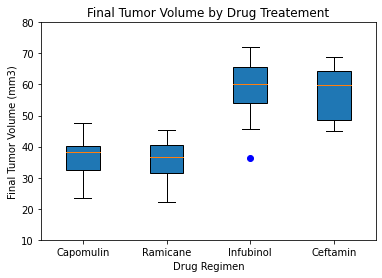

In [22]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data_to_plot = [dict_drugs["Capomulin_tumors"], dict_drugs["Ramicane_tumors"], dict_drugs["Infubinol_tumors"], dict_drugs["Ceftamin_tumors"]]

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume by Drug Treatement')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(data_to_plot, labels=drug_list, widths = 0.4, patch_artist=True,vert=True, sym='b')

plt.ylim(10, 80)

plt.show()


## Line and Scatter Plots

In [23]:
# find a mouse for treatment with capomulin
dict_drugs["Capomulin_df"]["Mouse ID"].unique()

array(['s185', 'x401', 'm601', 'f966', 'u364', 'y793', 'r554', 'm957',
       't565', 'i738', 'w914', 'g288', 'l897', 'b742', 'b128', 'j246',
       'j119', 'w150', 'v923', 'g316', 's710', 'l509', 'r944', 'i557',
       'r157'], dtype=object)

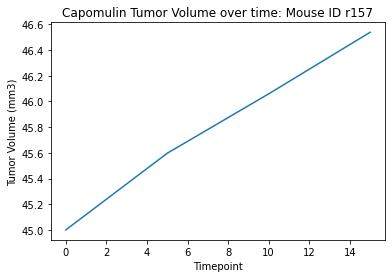

In [24]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# create x axis
x_axis =table_excl_dupe.loc[table_excl_dupe["Mouse ID"]== "r157"]
x_axis = x_axis["Timepoint"]

# create y axis
y_axis =table_excl_dupe.loc[table_excl_dupe["Mouse ID"]== "r157"]
y_axis = y_axis["Tumor Volume (mm3)"]

# create plot
plt.plot(x_axis, y_axis)

# add labels
plt.title("Capomulin Tumor Volume over time: Mouse ID r157")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

In [25]:
dict_drugs["Capomulin_df"]

# group by gender
weight_grouped = dict_drugs["Capomulin_df"].groupby(["Sex"])

# Calculate number and percentages by age group
gender_count = gender_grouped["Mouse ID"].nunique()
perc_by_gender = ((gender_count/num_mice_clean_unique)*100).astype(float).map("{:,.2f}%".format)

# Create summary data frame, sort by highest Total Count
gender_demographics = pd.DataFrame({   "Total Count": gender_count,
                                    "Percentage of Gender": perc_by_gender
                                    }).sort_values("Total Count", ascending=False)

# display age_demographics table
gender_demographics

,Total Count,Percentage of Gender
Sex,,
Male,125,50.40%
Female,123,49.60%


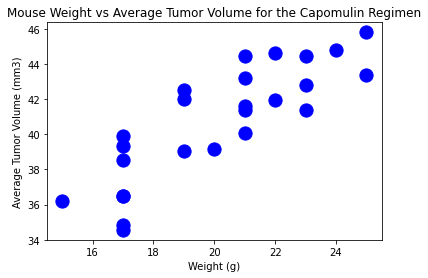

In [26]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
fig1, ax1 = plt.subplots()
av_vol =dict_drugs["Capomulin_df"].groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(av_vol['Weight (g)'],av_vol['Tumor Volume (mm3)'],s=175, color="blue")

# add labels
plt.title("Mouse Weight vs Average Tumor Volume for the Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

In [27]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(av_vol['Weight (g)'],av_vol['Tumor Volume (mm3)'])
print(f"The correlation between both weight and average tumor volume is {round(correlation[0],2)}")


The correlation between both weight and average tumor volume is 0.84


In [28]:
# calculate the line eqtn
x_values = av_vol['Weight (g)']
y_values = av_vol['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

y = 0.95x + 21.55


The r-squared is: 0.71


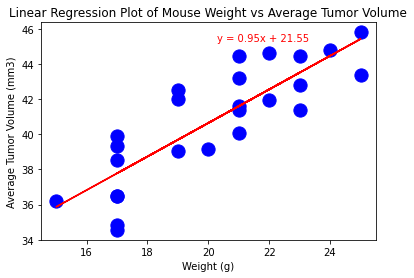

In [29]:
# scatter plot of linear regression model
fig1, ax1 = plt.subplots()
plt.scatter(x_values,y_values,s=175, color="blue")
plt.plot(x_values,regress_values,"r-")

# add labels
plt.title('Linear Regression Plot of Mouse Weight vs Average Tumor Volume')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# annotate
ax1.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',color="red")

# r squared value
print(f"The r-squared is: {round(rvalue**2,2)}")

plt.show()



In [30]:
# Three observations or insights about the data

# 1) With a 0.71 value for r-squared, there is a reasonably strong positive correlation between mouse weight and average tumor volume.

# 2) Capomulin and Ramicane appears to be more effective in comparison to the InfubinoL and Ceftamin Regimens due to the lower median final tumor volume observed. 

# 3) The number of trials per drug treatment is inconsistent with Capomulin and Ramicane undergoing more trials than other drugs, and Propriva Regimen undergoing significantly less, suggesting that results may be skewed.